In [42]:
import pandas as pd
df=pd.read_csv(f'../dataset/raw/CleanDataset.csv')

In [43]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                           1.000000
OverTime                            0.281113
Designation_Executive               0.239871
MaritalStatus_Single                0.219068
Involvement                         0.144332
JobSatisfaction                     0.126745
TravelProfile_Yes                   0.123964
EducationField_Engineer             0.090186
HomeToWork                          0.086266
Department_Sales                    0.078507
EducationField_Marketing Diploma    0.070850
NumCompaniesWorked                  0.049829
Gender_M                            0.035902
EducationField_MBA                  0.035813
HourlnWeek                          0.021145
WorkLifeBalance                     0.013608
ESOPs                               0.012200
Department_Marketing                0.010778
SalaryHikelastYear                 -0.006778
Unnamed: 0                         -0.023067
EmployeeID                         -0.023067
Designation_Senior Manager         -0.032605
LastPromot

In [44]:
feature_to_drop=['Unnamed: 0','EmployeeID','Attrition','NumCompaniesWorked','Gender_M','EducationField_MBA','HourlnWeek','WorkLifeBalance','ESOPs','Department_Marketing','SalaryHikelastYear',
'Designation_Senior Manager','LastPromotion','EducationField_Statistics','Gender_F','TravelProfile_Rarely','EducationField_CA']

In [45]:
X=df.drop(feature_to_drop,axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               5180 non-null   float64
 1   HomeToWork                        5180 non-null   float64
 2   Involvement                       5180 non-null   int64  
 3   JobSatisfaction                   5180 non-null   int64  
 4   OverTime                          5180 non-null   int64  
 5   WorkExperience                    5180 non-null   float64
 6   CurrentProfile                    5180 non-null   float64
 7   MonthlyIncome                     5180 non-null   float64
 8   TravelProfile_Yes                 5180 non-null   int64  
 9   Department_Analytics              5180 non-null   int64  
 10  Department_Sales                  5180 non-null   int64  
 11  EducationField_Engineer           5180 non-null   int64  
 12  Educat

In [46]:
y=df['Attrition']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Dense(100,activation='relu',input_dim=19))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               2000      
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 25)                1275      
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 8351 (32.62 KB)
Trainable params: 8351 (32.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
from tensorflow.keras.optimizers import Adam,SGD
#optimizer = SGD(learning_rate=0.1)
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
epochs_hist=model.fit(X_train,y_train,epochs=50,batch_size=35,verbose=1,validation_split=0.30)

Epoch 1/50
83/83 [==============================] - 2s 6ms/step - loss: 0.5200 - accuracy: 0.7503 - val_loss: 0.4393 - val_accuracy: 0.7998
Epoch 2/50
83/83 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.8169 - val_loss: 0.4212 - val_accuracy: 0.8095
Epoch 3/50
83/83 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8279 - val_loss: 0.4045 - val_accuracy: 0.8175
Epoch 4/50
83/83 [==============================] - 0s 4ms/step - loss: 0.3733 - accuracy: 0.8421 - val_loss: 0.3969 - val_accuracy: 0.8240
Epoch 5/50
83/83 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8528 - val_loss: 0.3787 - val_accuracy: 0.8368
Epoch 6/50
83/83 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8617 - val_loss: 0.3498 - val_accuracy: 0.8416
Epoch 7/50
83/83 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.8748 - val_loss: 0.3382 - val_accuracy: 0.8513
Epoch 8/50
83/83 [==

In [53]:
df=pd.DataFrame(epochs_hist.history)

<Axes: >

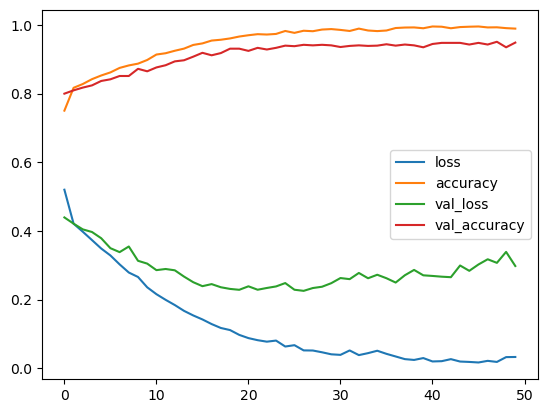

In [54]:
df.plot()

In [55]:
y_nn_pred=model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [56]:
import numpy as np
y_m_prd=np.argmax(y_nn_pred,axis=1)

In [57]:
y_nn_pred

array([[4.9694595e-06],
       [6.2401623e-01],
       [1.0000000e+00],
       ...,
       [5.5837359e-19],
       [1.6881078e-06],
       [1.0112970e-02]], dtype=float32)

In [58]:
thresholded_array = (y_nn_pred > 0.6).astype(int)

print(thresholded_array)

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [59]:
count_ones = np.sum(thresholded_array)  # Sum of the array gives count of 1s
count_zeros = thresholded_array.size - count_ones  # Total elements - count of 1s

print(f"Number of 1s: {count_ones}")
print(f"Number of 0s: {count_zeros}")

Number of 1s: 289
Number of 0s: 747


In [60]:
logits = model.predict(X_test)  # Without activation
print(logits.min(), logits.max())


33/33 [==============================] - 0s 2ms/step
3.182313e-22 1.0


In [61]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,thresholded_array)

0.9059233449477352

In [62]:
confusion_matrix(y_test,thresholded_array)

array([[722,  29],
       [ 25, 260]], dtype=int64)